Here's useful code on how to make tables and confusion matrices based on results.

In [2]:
import numpy as np
import pandas as pd
train_labels = ['__label__Legal/Regulation',
 '__label__Opinionated_News',
 '__label__News/Reporting',
 '__label__Forum',
 '__label__Correspondence',
 '__label__Invitation',
 '__label__Instruction',
 '__label__Recipe',
 '__label__Opinion/Argumentation',
 '__label__Promotion_of_Services',
 '__label__Promotion',
 '__label__List_of_Summaries/Excerpts',
 '__label__Promotion_of_a_Product',
 '__label__Call',
 '__label__Review',
 '__label__Other',
 '__label__Information/Explanation',
 '__label__Interview',
 '__label__Prose',
 '__label__Research_Article',
 '__label__Announcement']

STR_TO_NUM = {s: i for i, s in enumerate(train_labels)}
NUM_TO_STR = {i: s for i, s in enumerate(train_labels)}


def plot_cm(y_true, y_pred, labels, save=False, title=None):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    import matplotlib.pyplot as plt
    plt.style.use(["science", "no-latex", ])
    cm = confusion_matrix(y_true, y_pred, labels=labels, )
    # print(cm)
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
    classNames = labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)
    microF1 = f1_score(y_true, y_pred, labels=labels, average ="micro")
    macroF1 = f1_score(y_true, y_pred, labels=labels, average ="macro")

    print(f"{microF1=:0.4}")
    print(f"{macroF1=:0.4}")

    metrics = f"{microF1=:0.4}, {macroF1=:0.4}"
    if title:
        plt.title(title +";\n" + metrics)
    else:
        plt.title(metrics)
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()
    return microF1, macroF1

In [3]:
import pandas as pd
with open("backup_12.txt", "r") as f:
    content = f.readline()
    from ast import literal_eval
    content = literal_eval(content)
jsonlikecontent = dict()
for key in content[0].keys():
    jsonlikecontent[key] = [i[key] for i in content]



df = pd.DataFrame(data=jsonlikecontent)
df.tail()

,microF1,macroF1,y_true,y_pred,train,eval
43,0.609137,0.521590,"[__label__Promotion_of_a_Product, __label__Pro...","[__label__Promotion_of_a_Product, __label__Pro...",dd,test_dd
44,0.540000,0.518452,"[__label__Opinion/Argumentation, __label__Opin...","[__label__Opinionated_News, __label__Opinionat...",dd,test_full
45,0.540000,0.425843,"[__label__News/Reporting, __label__News/Report...","[__label__News/Reporting, __label__News/Report...",dd,dev_full
46,0.582915,0.499443,"[__label__News/Reporting, __label__News/Report...","[__label__News/Reporting, __label__News/Report...",dd,dev_dd
47,0.619289,0.567954,"[__label__Promotion_of_a_Product, __label__Pro...","[__label__Promotion_of_a_Product, __label__Pro...",dd,test_dd


In [16]:
print("""
|trained on | evaluated on | micro F1 | macro F1|
|---        | ---          | ---      | ---     |""")
import numpy as np
for train_variant in ["full", "dd"]:
    for eval_split in ["test", "dev"]:
        for eval_variant in ["full", "dd"]:
            c1 = df.train == train_variant
            c2 = df.loc[:, "eval"] == f"{eval_split}_{eval_variant}"

            subset = df[c1&c2].copy()
            micros = subset.microF1.values
            mi_mean = np.average(micros)
            mi_std = np.std(micros)


            macros = subset.macroF1.values
            ma_mean = np.average(macros)
            ma_std = np.std(macros)
            print(f"|{train_variant}|{eval_split+', '+eval_variant}|{mi_mean:0.3} +/- {mi_std:0.3}|{ma_mean:0.3}+/-{ma_std:0.3}|")
            #print(df[c1&c2].loc[:, ["microF1", "macroF1"]])



|trained on | evaluated on | micro F1 | macro F1|
|---        | ---          | ---      | ---     |
|full|test, full|0.615 +/- 0.021|0.613+/-0.0251|
|full|test, dd|0.618 +/- 0.00873|0.56+/-0.013|
|full|dev, full|0.583 +/- 0.00927|0.506+/-0.0249|
|full|dev, dd|0.635 +/- 0.00932|0.558+/-0.0162|
|dd|test, full|0.541 +/- 0.0129|0.5+/-0.0287|
|dd|test, dd|0.623 +/- 0.0126|0.559+/-0.0428|
|dd|dev, full|0.529 +/- 0.0179|0.451+/-0.0547|
|dd|dev, dd|0.597 +/- 0.00919|0.552+/-0.0387|


In [17]:
df.loc[df.train=="full", ["microF1", "macroF1", "train", "eval"]]

,microF1,macroF1,train,eval
0,0.610000,0.604492,full,test_full
1,0.595000,0.500528,full,dev_full
2,0.643216,0.532130,full,dev_dd
3,0.619289,0.536672,full,test_dd
4,0.600000,0.598346,full,test_full
5,0.570000,0.531092,full,dev_full
6,0.628141,0.573329,full,dev_dd
7,0.609137,0.554684,full,test_dd
8,0.590000,0.578370,full,test_full
9,0.575000,0.508476,full,dev_full


# Analysis:

Why are the performances of evaluations on train and dev data so different?

microF1=0.595
macroF1=0.5005


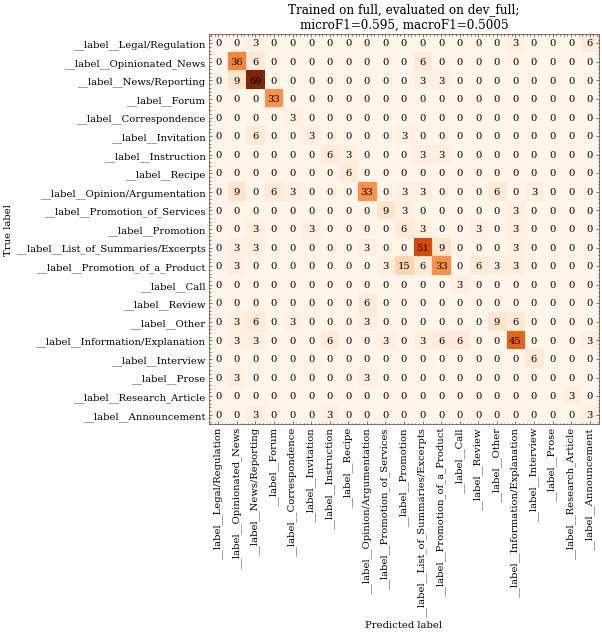

microF1=0.57
macroF1=0.5311


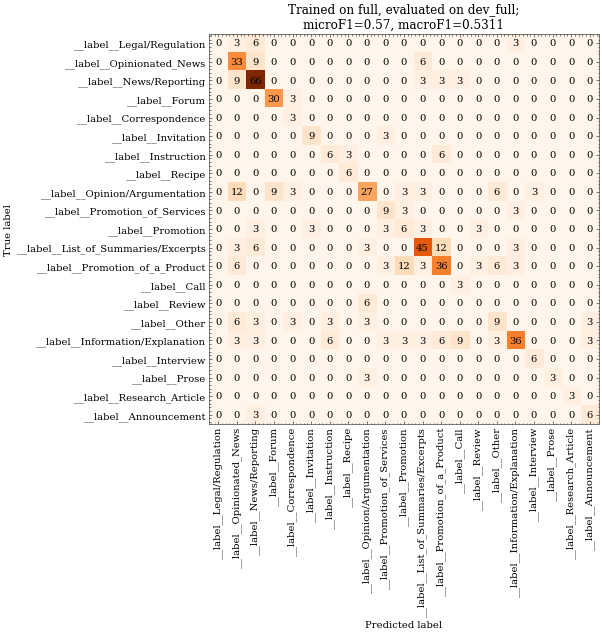

microF1=0.575
macroF1=0.5085


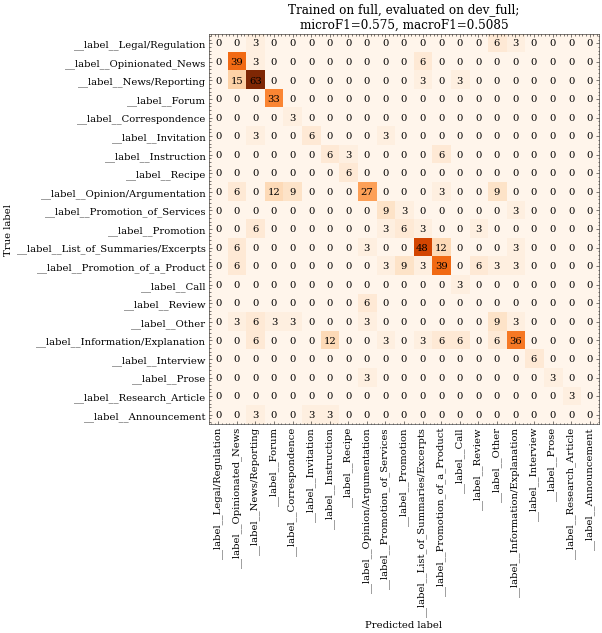

microF1=0.59
macroF1=0.5274


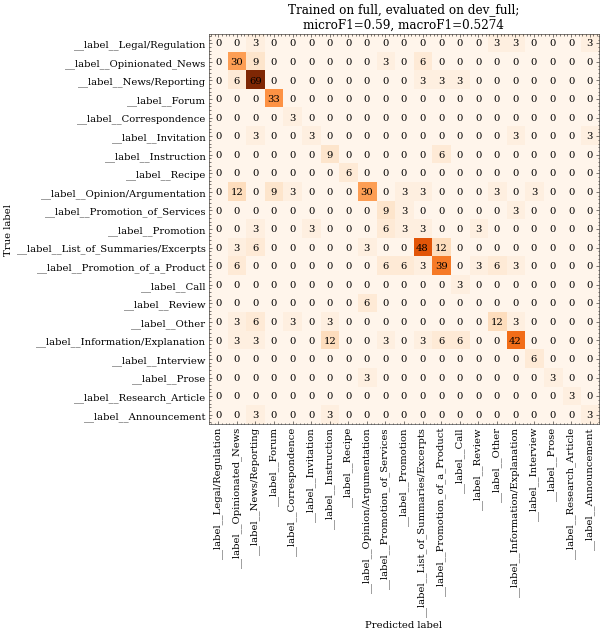

microF1=0.585
macroF1=0.4616


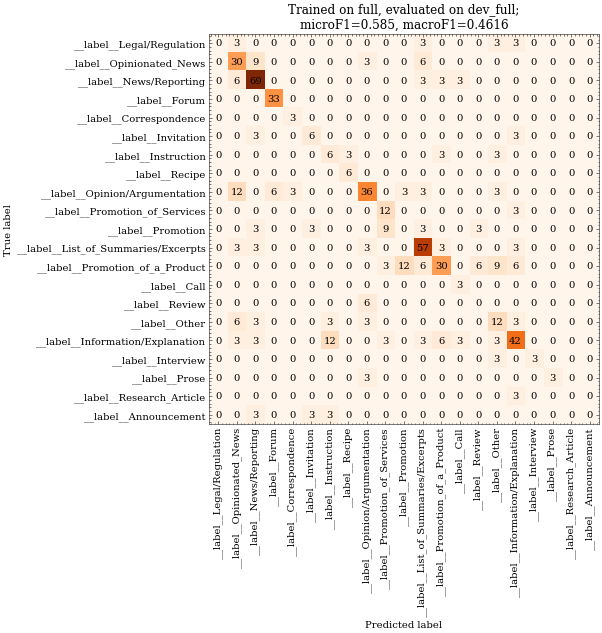

microF1=0.583
macroF1=0.5144


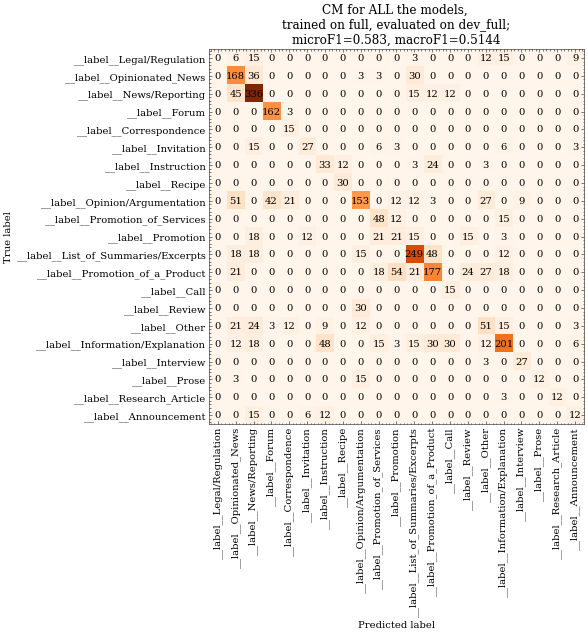

microF1=0.61
macroF1=0.6045


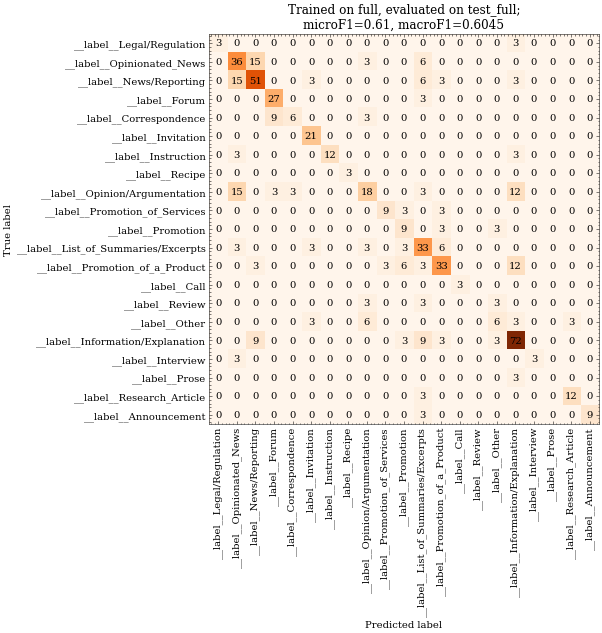

microF1=0.6
macroF1=0.5983


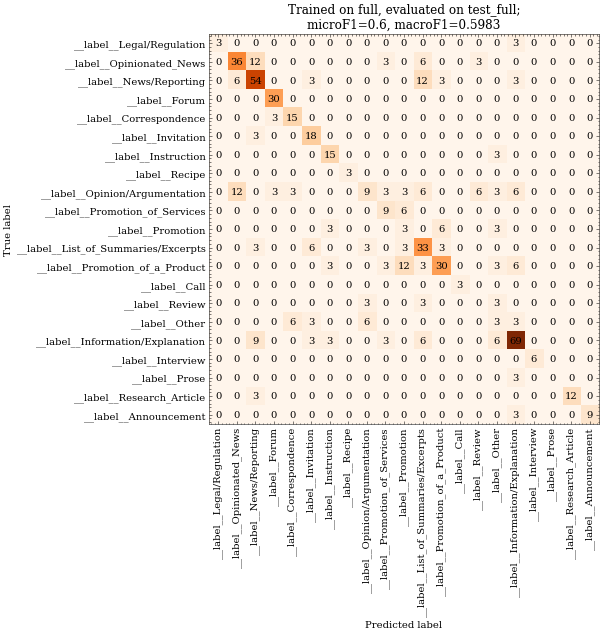

microF1=0.59
macroF1=0.5784


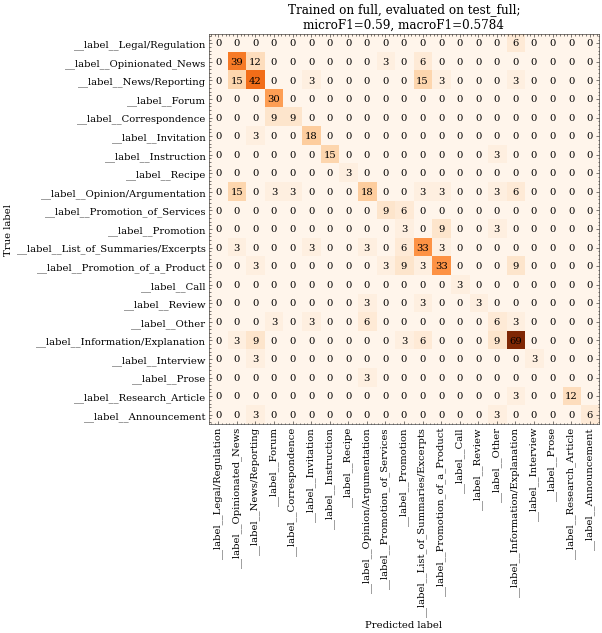

microF1=0.65
macroF1=0.6459


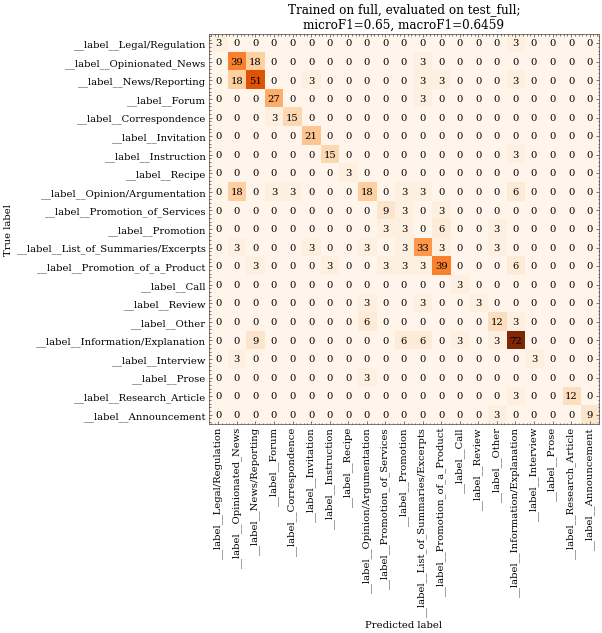

microF1=0.625
macroF1=0.6373


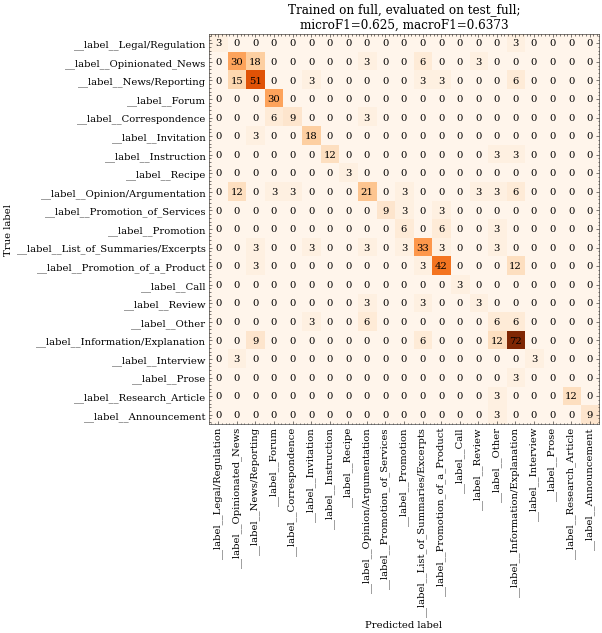

microF1=0.615
macroF1=0.6135


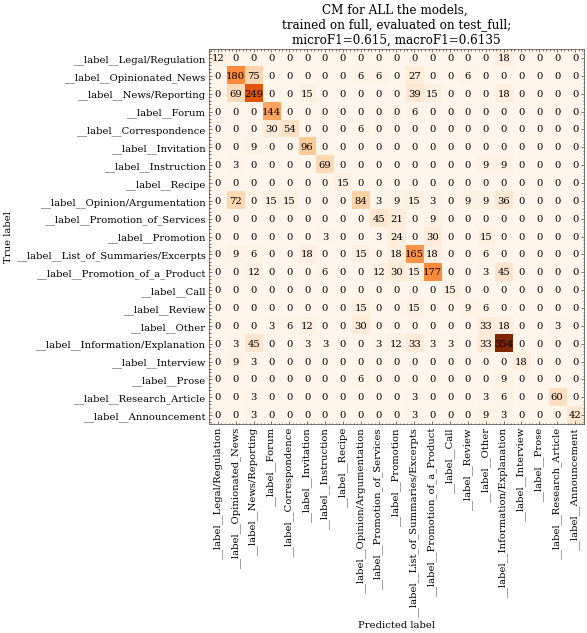

(0.615, 0.6135265804973322)

In [18]:
regime = "dev_full"
indices = [1,5,9, 13, 17]
y_pred_agg = []
y_true_agg = []
for i in indices:
    y_true = df.y_true[i]
    y_pred = df.y_pred[i]
    plot_cm(y_true, y_pred, train_labels, title=f"Trained on full, evaluated on {regime}",
                #save=f"images/13_cm_{regime}_{i}"
                )
    y_pred_agg.extend(y_pred)
    y_true_agg.extend(y_true)
plot_cm(y_true_agg, y_pred_agg, train_labels, title=f"CM for ALL the models, \ntrained on full, evaluated on {regime}",
        save = f"images/13_{regime}_aggregated.png")




regime = "test_full"
indices = [0,4,8, 12, 16]
y_pred_agg = []
y_true_agg = []
for i in indices:
    y_true = df.y_true[i]
    y_pred = df.y_pred[i]
    plot_cm(y_true, y_pred, train_labels, 
                title=f"Trained on full, evaluated on {regime}",
                save=f"images/13_cm_{regime}_{i}"
                )
    y_pred_agg.extend(y_pred)
    y_true_agg.extend(y_true)
plot_cm(y_true_agg, y_pred_agg, train_labels, 
        title=f"CM for ALL the models, \ntrained on full, evaluated on {regime}",
        save = f"images/13_{regime}_aggregated.png"
        )

In [8]:
macros = dict()
micros = dict()
for split in ["full", "dd"]:
    c1 = df.train == f"{split}"
    c2 = df["eval"] == f"test_{split}"

    macros[split] = df[c1&c2].macroF1.values[0:5]
    micros[split] = df[c1&c2].microF1.values[0:5]

macros, micros

({'full': array([0.60449211, 0.59834619, 0.57836986, 0.64590714, 0.63732286]),
  'dd': array([0.5800475 , 0.53609255, 0.48724485, 0.62023968, 0.59773486])},
 {'full': array([0.61 , 0.6  , 0.59 , 0.65 , 0.625]),
  'dd': array([0.61928934, 0.63451777, 0.60406091, 0.63451777, 0.63959391])})